# Import Libraries

In [66]:
# data manipulation
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# data preprocessing
import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize

# data modelling
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# model optimization
from sklearn.model_selection import GridSearchCV

# pickle file
import pickle

# Import Dataset

In [5]:
df = pd.read_csv('news.csv')
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


# Exploratory Data Analysis (EDA)

In [7]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


Top 5 Topic

In [10]:
df['title'].value_counts().head(5)

title
OnPolitics | 's politics blog                                                                         5
Michael Moore Owes Me $4.99                                                                           3
Hillary’s “Big Tent” is Obama’s “Grand Bargain” on Steroids                                           3
Get Ready For Civil Unrest: Survey Finds That Most Americans Are Concerned About Election Violence    3
The Dark Agenda Behind Globalism And Open Borders                                                     2
Name: count, dtype: int64

Count Label

In [12]:
label = df['label']

label_counts = label.value_counts().sort_values(ascending=False)
label_counts

label
REAL    3171
FAKE    3164
Name: count, dtype: int64

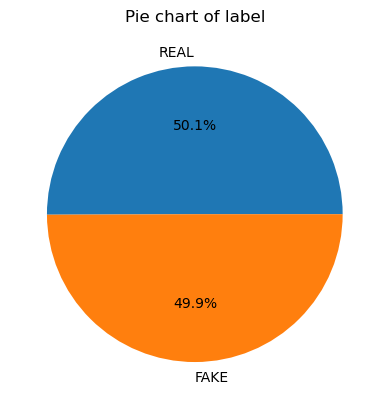

In [13]:
# create a pie chart
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%')

# add title
plt.title('Pie chart of label')

# show the plot
plt.show()

# Data Pre-processing

## Missing Value

In [16]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

## Duplicated Value

In [18]:
df.duplicated().sum()

0

In [19]:
df_cp = df.copy()

## Drop column

In [21]:
df_cp.drop(columns=['Unnamed: 0'], inplace=True)
df_cp.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


## Title + Text Column

In [23]:
df_cp['news'] = df_cp['title'] + ' ' + df_cp['text']
df_cp.head()

,title,text,label,news
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,You Can Smell Hillary’s Fear Daniel Greenfield...
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,Watch The Exact Moment Paul Ryan Committed Pol...
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,Kerry to go to Paris in gesture of sympathy U....
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,Bernie supporters on Twitter erupt in anger ag...
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,The Battle of New York: Why This Primary Matte...


## Count len of text

In [25]:
df_cp['news_len'] = df_cp['news'].apply(len)
df_cp.head()

,title,text,label,news,news_len
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,You Can Smell Hillary’s Fear Daniel Greenfield...,7547
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,Watch The Exact Moment Paul Ryan Committed Pol...,2732
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,Kerry to go to Paris in gesture of sympathy U....,2587
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,Bernie supporters on Twitter erupt in anger ag...,2745
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,The Battle of New York: Why This Primary Matte...,1889


In [26]:
df_cp.describe()

,news_len
count,6335.000000
mean,4773.528019
std,5091.586399
min,14.000000
25%,1804.500000
50%,3709.000000
75%,6254.500000
max,115448.000000


## Outlier

In [28]:
# Remove outliers (texts with very short lengths)
min_text_length = 20
df_cp = df_cp[df_cp['news_len'] >= min_text_length]
df_cp.describe()

,news_len
count,6334.000000
mean,4774.279444
std,5091.637067
min,26.000000
25%,1805.250000
50%,3713.500000
75%,6255.750000
max,115448.000000


## Clean Text

In [30]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MARULI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MARULI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\MARULI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\MARULI\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [31]:
# Defining a function to clean up the text
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def clean(Text):
    sms = re.sub('[^a-zA-Z]', ' ', Text) #Replacing all non-alphabetic characters with a space
    sms = sms.lower() #converting to lowecase 
    sms = word_tokenize(sms)
    sms = [lemmatizer.lemmatize(word, pos ='v') for word in sms if not word in stopwords.words("english")]
    sms = ' '.join(sms)
    return sms

df_cp["clean_news"] = df_cp["news"].apply(clean)
df_cp.head()

,title,text,label,news,news_len,clean_news
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,You Can Smell Hillary’s Fear Daniel Greenfield...,7547,smell hillary fear daniel greenfield shillman ...
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,Watch The Exact Moment Paul Ryan Committed Pol...,2732,watch exact moment paul ryan commit political ...
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,Kerry to go to Paris in gesture of sympathy U....,2587,kerry go paris gesture sympathy u secretary st...
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,Bernie supporters on Twitter erupt in anger ag...,2745,bernie supporters twitter erupt anger dnc try ...
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,The Battle of New York: Why This Primary Matte...,1889,battle new york primary matter primary day new...


## Word Cloud

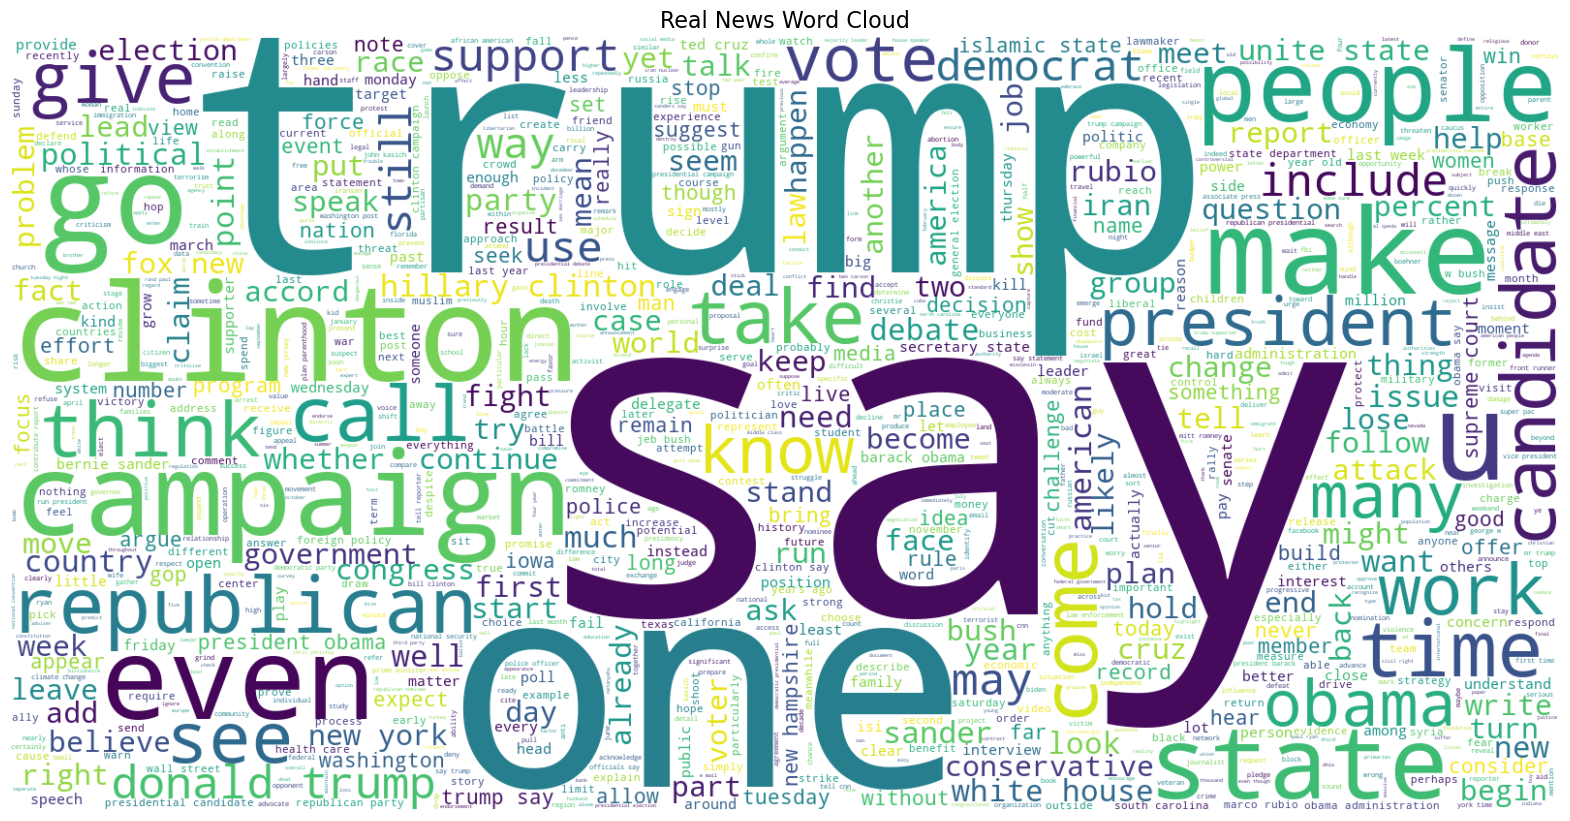

In [32]:
# word cloud after joining title and text:
real_news_df = df_cp[df_cp['label'] == 'REAL']
real_news = ' '.join(real_news_df['clean_news'].astype(str))

# Create the WordCloud object and assign it to wc
wc = WordCloud(
    max_words=1000,
    width=1600,
    height=800,
    background_color='white',
    colormap='viridis'
).generate(real_news)

plt.figure(figsize=(20, 20))
plt.axis('off')
plt.title("Real News Word Cloud", fontsize=16)
plt.imshow(wc, interpolation='bilinear')
plt.show()

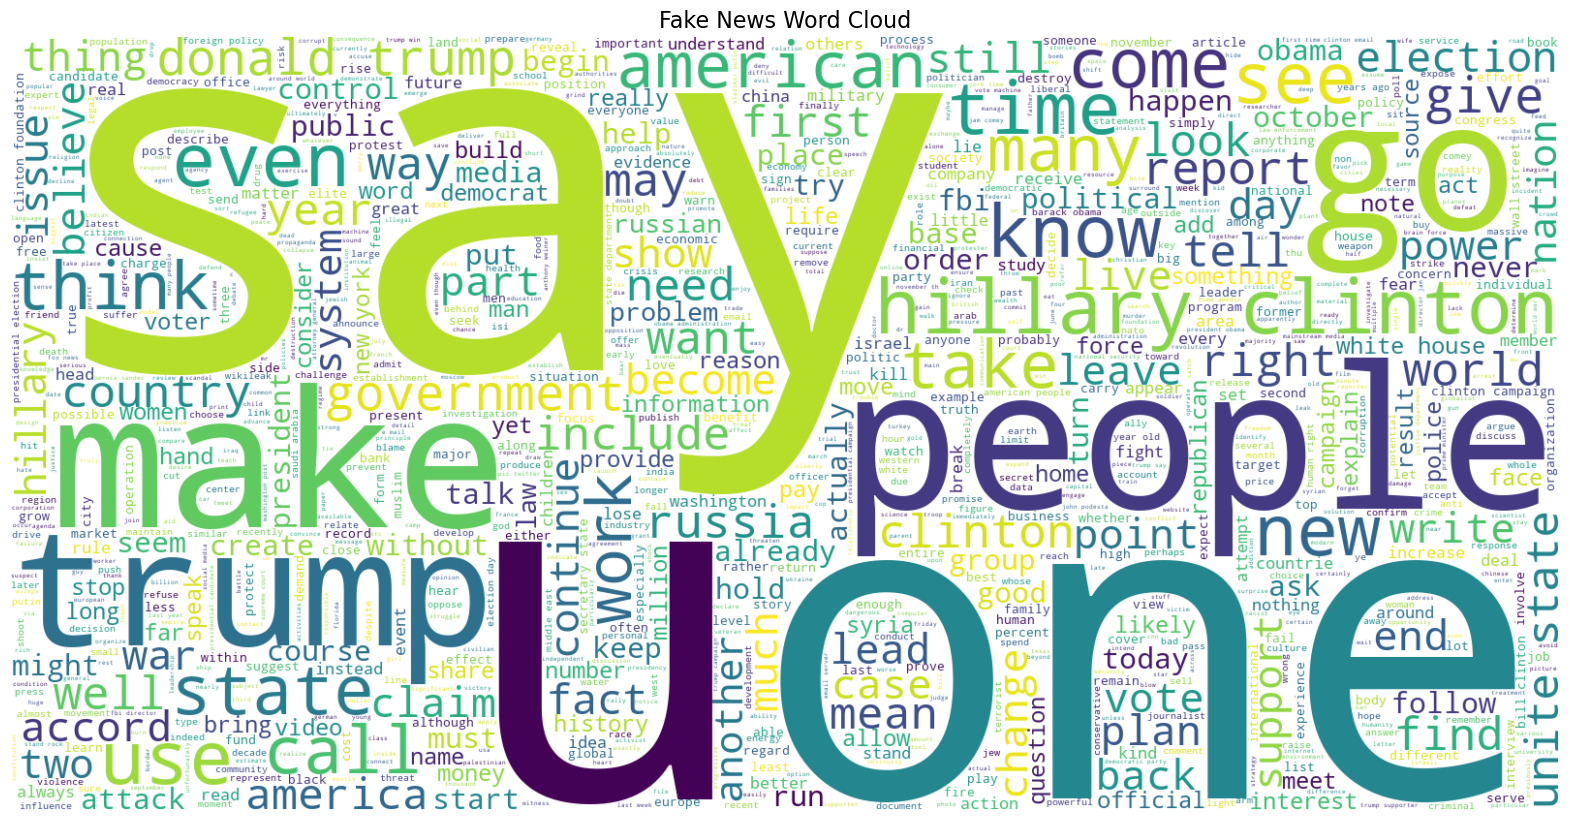

In [33]:
# word cloud after joining title and text:
fake_news_df = df_cp[df_cp['label'] == 'FAKE']
fake_news = ' '.join(fake_news_df['clean_news'].astype(str))

# Create the WordCloud object and assign it to wc
wc = WordCloud(
    max_words=1000,
    width=1600,
    height=800,
    background_color='white',
    colormap='viridis'
).generate(fake_news)

plt.figure(figsize=(20, 20))
plt.axis('off')
plt.title("Fake News Word Cloud", fontsize=16)
plt.imshow(wc, interpolation='bilinear')
plt.show()

## Vectorization

In [35]:
#Changing text data in to numbers.
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df_cp["clean_news"])
#Let's have a look at our feature
X.dtype

dtype('float64')

In [37]:
pickle.dump(tfidf, open('vectorization.pkl', 'wb'))

## Split data

In [39]:
#Setting values for labels and feature as y and X(we already did X in vectorizing...)
y = df_cp["label"]
# Splitting the testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5067, 54815)
(1267, 54815)
(5067,)
(1267,)


# Model Training

In [80]:
def classification_eval(actual, predict, name):

  cm = confusion_matrix(actual, predict)
  # plot confusion matrix
  plt.figure(figsize=(8,6))
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
              xticklabels=['Predicted Negative', 'Predicted Positive'],
              yticklabels=['Actual Negative', 'Actual Positive'])
  plt.xlabel('Predicted Labels')
  plt.ylabel('Actual Lables')
  plt.title(f'Confusion Matrix - {name}')
  plt.show()

  print(classification_report(actual, predict))

In [70]:
models = {
    'Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(),
    'K-NN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC()
}

results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    results.append({'Model': model_name, 'Accuracy': accuracy})

df_accuracy = pd.DataFrame(results).sort_values(by=['Accuracy'], ascending=False)
df_accuracy

,Model,Accuracy
4,Support Vector Machine,0.922652
3,Logistic Regression,0.912391
1,Random Forest,0.904499
2,K-NN,0.846093
0,Naive Bayes,0.842147


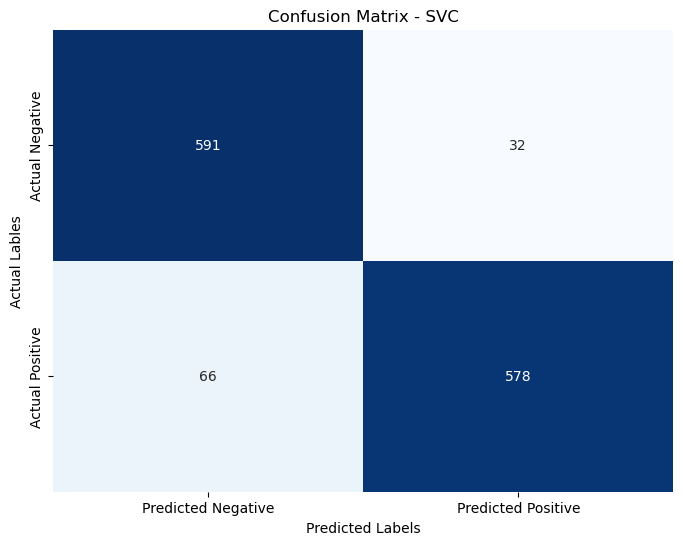

              precision    recall  f1-score   support

        FAKE       0.90      0.95      0.92       623
        REAL       0.95      0.90      0.92       644

    accuracy                           0.92      1267
   macro avg       0.92      0.92      0.92      1267
weighted avg       0.92      0.92      0.92      1267



In [82]:
svc = SVC()

svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

classification_eval(y_test, y_pred_svc, 'SVC')

# Tuning Model

In [72]:
svc = SVC()

# define parameters for GridSearchCV
parameters = {'C': [0.1, 1, 10, 100],
              'gamma': ['scale', 'auto'],
              'kernel': ['linear', 'rbf']}

grid_search = GridSearchCV(estimator=svc, param_grid=parameters, cv=3, verbose=2)

grid_search.fit(X_train, y_train)

# Best parameters
print(f"Best Parameters found: {grid_search.best_params_}")

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=  19.5s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=  19.6s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=  19.2s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  24.7s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  21.4s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  21.7s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=  17.1s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=  17.0s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=  17.8s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=  23.6s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=  27.9s
[CV] END ......................C=0.1, gamma=auto

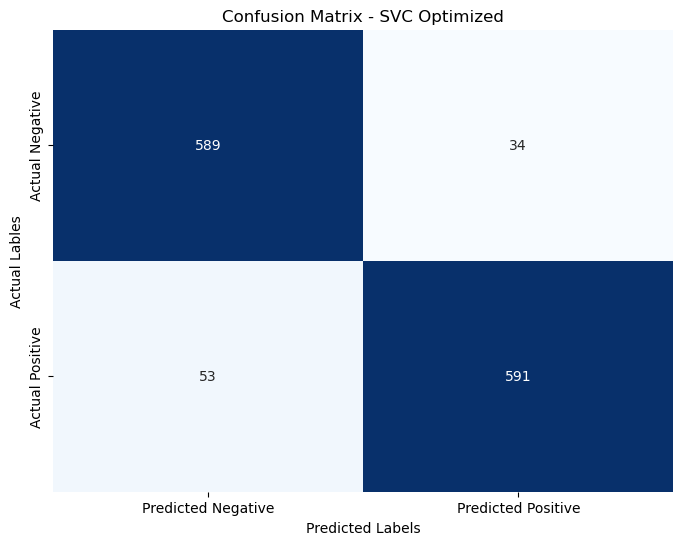

              precision    recall  f1-score   support

        FAKE       0.92      0.95      0.93       623
        REAL       0.95      0.92      0.93       644

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267



In [83]:
svc_2 = SVC(C=1, gamma='scale', kernel='linear')
model_svc = svc_2.fit(X_train, y_train)
y_pred_svc_2 = svc_2.predict(X_test)

classification_eval(y_test, y_pred_svc_2, 'SVC Optimized')

In [84]:
pickle.dump(model_svc, open('model_svc.pkl', 'wb'))